Importar librerías

In [3]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np

# Leer y escribir fácilmente ficheros en formato CSV
import pandas as pd

# Para hacer tablas
from tabulate import tabulate

# Librerias para graficación
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  #Para graficar superficies 3D

# Para separa el 20% y 80%
from sklearn.model_selection import train_test_split

# Le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

In [4]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


Datos del dataset

In [6]:
# Libreria pandas para leer el dataset.
datos = pd.read_csv('/content/gdrive/MyDrive/SIS 420/datasets/full_data_flightdelay.csv')

In [7]:
# Limpiando el dataset
dataset=datos.drop(columns=['CARRIER_NAME', 'PREVIOUS_AIRPORT','LONGITUDE','DEPARTING_AIRPORT','AIRPORT_FLIGHTS_MONTH','DEP_TIME_BLK','PRCP',	'SNOW',	'SNWD',	'TMAX',	'AWND','AVG_MONTHLY_PASS_AIRPORT','AVG_MONTHLY_PASS_AIRLINE','AIRLINE_FLIGHTS_MONTH'])

In [8]:
# Muestra el dataset limpio
dataset

,MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRLINE_AIRPORT_FLIGHTS_MONTH,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,LATITUDE
0,1,7,0,2,1,25,143,5873,0.000062,0.000099,8,36.080
1,1,7,0,7,1,29,191,1174,0.000144,0.000149,3,36.080
2,1,7,0,7,1,27,199,1174,0.000144,0.000149,18,36.080
3,1,7,0,9,1,27,180,1174,0.000144,0.000149,2,36.080
4,1,7,0,7,1,10,182,1257,0.000009,0.000125,1,36.080
...,...,...,...,...,...,...,...,...,...,...,...,...
6489057,12,7,0,1,11,3,123,757,0.000120,0.000198,18,21.979
6489058,12,7,0,1,11,2,123,757,0.000120,0.000198,16,21.979
6489059,12,7,0,1,11,2,123,757,0.000120,0.000198,18,21.979
6489060,12,7,0,1,12,3,123,757,0.000120,0.000198,18,21.979


Datos separados

In [9]:
# Datos separados, el 80% y 20%
train_dataset, test_dataset = train_test_split(dataset, test_size=0.2, random_state=42)

# Separamos en 'X_test' los datos, pero sin la y que seria 'DEP_DEL15'
X_test = test_dataset.drop(['DEP_DEL15'], axis=1).values

# Separamos en 'y_test' los datos de la columna de 'DEP_DEL15'
y_test = test_dataset['DEP_DEL15'].values

# Tomamos train_dataset, seleccionamos las columnas para 'X_train' y la columna 'DEP_DEL15' para 'y_train'
X_train = train_dataset.drop(['DEP_DEL15'], axis=1).values
y_train = train_dataset['DEP_DEL15'].values
m_train = len(y_train)


#Imprimimos algunos datos:
# Imprimir todos las X de datos solo 10
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]', 'Y'
))
print('-' * 110)

for i in range(10):
    print('{:8.0f}{:8.0f}{:10.0f}{:10.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:10.0f}{:8.0f}{:12.0f}'.format(
        X_train[i, 0], X_train[i, 1], X_train[i, 2], X_train[i, 3], X_train[i, 4], X_train[i, 5], X_train[i, 6], X_train[i, 7], X_train[i, 8], X_train[i, 9], X_train[i, 10], y_train[i]
    ))


# Muestra la cantidad de ejemplos
print(" ")
print('El 80% de entrenamiento son la cantidad de: {:.0f} de ejemplos'.format( len(train_dataset)))
print('El 20% para pruebas son la cantidad de: {:.0f} de ejemplos'.format( len(test_dataset)))

  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]         Y
--------------------------------------------------------------------------------------------------------------
      11       3         2         6      33      69    2542       0       0        15      41           0
      12       5         4         4      81     128   12551       0       0         4      33           0
       4       3         1         2      56      90    7448       0       0         5      35           0
       3       6         4         5       2     129     237       0       0        11      34           0
       9       4         2         4      62     150    8345       0       0        19      35           0
       5       5         7         2      25     178     454       0       0         5      42           0
       4       5         3         2      41      50    5184       0       0        14      42           0
      12       6         4        

Normalización de características

In [10]:
def  featureNormalize(X):
    X_norm = X.copy()

    # Array de ceros con una longitud igual al número de columnas en el array X.
    # La variable mu y sigma se inicializa como este array de ceros.
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    # Promedio de cada columna de X
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)

    sigma[sigma == 0] = 1

    # Formula para normalizar datos
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma


In [11]:
X_norm, mu, sigma= featureNormalize(X_train)

# Imprime todos las X_norm de datos solo 10
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]'
))
print('-' * 110)

for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:10.3f}{:8.3f}'.format(
        X_norm[i, 0], X_norm[i, 1], X_norm[i, 2], X_norm[i, 3], X_norm[i, 4], X_norm[i, 5], X_norm[i, 6], X_norm[i, 7], X_norm[i, 8], X_norm[i, 9], X_norm[i, 10]
    ))

  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]
--------------------------------------------------------------------------------------------------------------
   1.294  -0.469    -0.765     1.680   0.240  -1.394  -0.216  -1.114  -0.252     0.500   0.740
   1.588   0.533     0.075     0.542   2.472  -0.124   2.139   0.008   0.897    -1.086  -0.693
  -0.767  -0.469    -1.184    -0.596   1.310  -0.942   0.939  -1.128  -0.980    -0.942  -0.270
  -1.062   1.035     0.075     1.111  -1.201  -0.102  -0.758  -1.128  -0.980    -0.077  -0.571
   0.705   0.032    -0.765     0.542   1.589   0.350   1.150   0.008   0.897     1.077  -0.270
  -0.473   0.533     1.334    -0.596  -0.132   0.953  -0.707  -1.022  -0.235    -0.942   1.028
  -0.767   0.533    -0.345    -0.596   0.612  -1.803   0.406   2.902  -0.617     0.356   0.958
   1.588   1.035     0.075    -0.027   0.101  -1.803  -0.108  -0.733  -0.786    -1.374  -0.502
   1.294  -0.970    -0.765    -0.

In [12]:
X_ready = np.concatenate([np.ones((m_train, 1)), X_norm], axis=1)

# print(len(X_ready[0]))

# Imprime todos las X_norm de datos solo 10
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]', 'X[:, 11]'
))
print('-' * 130)

for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:10.3f}{:8.3f}{:8.3f}'.format(
        X_ready[i, 0], X_ready[i, 1], X_ready[i, 2], X_ready[i, 3], X_ready[i, 4], X_ready[i, 5], X_ready[i, 6], X_ready[i, 7], X_ready[i, 8], X_ready[i, 9], X_ready[i, 10], X_ready[i, 11]
    ))

  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]  X[:, 11]
----------------------------------------------------------------------------------------------------------------------------------
   1.000   1.294    -0.469    -0.765   1.680   0.240  -1.394  -0.216  -1.114    -0.252   0.500   0.740
   1.000   1.588     0.533     0.075   0.542   2.472  -0.124   2.139   0.008     0.897  -1.086  -0.693
   1.000  -0.767    -0.469    -1.184  -0.596   1.310  -0.942   0.939  -1.128    -0.980  -0.942  -0.270
   1.000  -1.062     1.035     0.075   1.111  -1.201  -0.102  -0.758  -1.128    -0.980  -0.077  -0.571
   1.000   0.705     0.032    -0.765   0.542   1.589   0.350   1.150   0.008     0.897   1.077  -0.270
   1.000  -0.473     0.533     1.334  -0.596  -0.132   0.953  -0.707  -1.022    -0.235  -0.942   1.028
   1.000  -0.767     0.533    -0.345  -0.596   0.612  -1.803   0.406   2.902    -0.617   0.356   0.958
   1.000   1.588     1.035     0.075  -0.0

Función Sigmoidea

In [13]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # Convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

In [14]:
print(sigmoid(0))

0.5


In [15]:
z = [0.5, 6, 5]
print(sigmoid(z))

[0.62245933 0.99752738 0.99330715]


Funcion de Costo y Gradiente

In [16]:
def calcularCosto(theta, X, y):

    # Inicializar algunos valores utiles, numero de ejemplos de entrenamiento
    m = y.size

    J = 0

    # Funcion sigmoid
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [17]:
def descensoGradiente(theta, X, y, alpha, num_iters):

    # Inicializa algunos valores, numero de ejemplos de entrenamiento
    m = y.shape[0]

    # Realiza una copia de theta, será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

In [18]:
# Theta con 19 columnas de ceros
theta = np.zeros(len(X_ready[0]))

#numero de iteraciones sera 900 y un alpha 0.009
num_ite = 2000
alpha = 0.009

theta, J_historico = descensoGradiente(theta, X_ready, y_train, alpha, num_ite)

print("'--")
print("Los valores de theta calculados son:")
i = 0
for tht in theta:
    i += 1
    print(f"theta {i}: {tht}")


print(f"--")
#mostramos el ultimo costo, este seria el mejor costo
print(f"Con un costo de: { J_historico[-1]} ")


'--
Los valores de theta calculados son:
theta 1: -1.4059678677876137
theta 2: -0.04607415538976862
theta 3: 0.006024317469952594
theta 4: 0.08145873441864167
theta 5: 0.2716886796993103
theta 6: 0.02019972468822485
theta 7: 0.055768625878243105
theta 8: 0.007302833517500129
theta 9: 0.0062299855945587845
theta 10: -0.03232431086085983
theta 11: 0.010582045052421654
theta 12: 0.016539429585359536
--
Con un costo de: 0.4771927460799797 


Grafica de la convergencia del costo

Text(0, 0.5, 'Costo J')

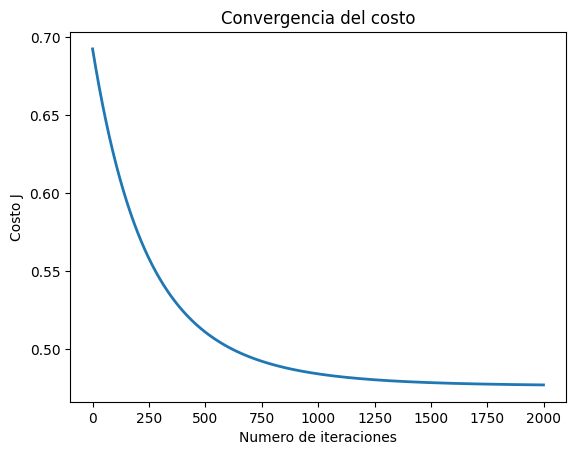

In [19]:
pyplot.plot(np.arange(len(J_historico)), J_historico, lw=2)
pyplot.title("Convergencia del costo")
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

EJEMPLO

In [20]:
X_array = [1,7,0,2,1,25,143,5873,0.000062,0.000099,8,36.080]
X_array_copy = X_array.copy()
# Se normaliza las caracteristicas para la prueba
# haciendo el uso de mu y sigma calculados anteriormente
# solamente los valores despues del primero, porque este es el 1.
X_array[1:] = (X_array[1:] - mu) / sigma

resultados = sigmoid(np.dot(X_array, theta))

print(f"Un pasajero con las caracteristicas: {X_array_copy} ")
print(f'Tiene una probabilidad de que su vuelo se retrase de un: {resultados * 100} %')

print(f"Con valores de theta: { theta }")

Un pasajero con las caracteristicas: [1, 7, 0, 2, 1, 25, 143, 5873, 6.2e-05, 9.9e-05, 8, 36.08] 
Tiene una probabilidad de que su vuelo se retrase de un: 14.508478869840616 %
Con valores de theta: [-1.40596787 -0.04607416  0.00602432  0.08145873  0.27168868  0.02019972
  0.05576863  0.00730283  0.00622999 -0.03232431  0.01058205  0.01653943]


EJEMPLO DE PREDICCIONES

In [21]:
nombres_columnas = ['MONTH',	'DAY_OF_WEEK',	'DISTANCE_GROUP',	'SEGMENT_NUMBER',	'CONCURRENT_FLIGHTS',	'NUMBER_OF_SEATS',	'AIRLINE_AIRPORT_FLIGHTS_MONTH',	'FLT_ATTENDANTS_PER_PASS',	'GROUND_SERV_PER_PASS',	'PLANE_AGE',	'LATITUDE',	'DEP_DEL15']

matriz_datos = np.array([
[1,7,2,1,25,143,5873,0.000062,0.000099,8,36.080],
[1,7,2,1,24,143,5873,0.000062,0.000095,8,28.080],
[2,5,4,1,25,173,5876,0.000062,0.000099,8,30.080],
[2,4,4,1,27,134,5876,0.000065,0.000099,8,34.080],
[3,6,6,1,25,156,5876,0.000062,0.000094,9,36.080],
[3,1,4,1,25,152,5878,0.000062,0.000099,9,36.080],
[4,2,2,1,26,149,5878,0.000062,0.000097,12,32.080],
[4,3,4,1,27,146,5878,0.000073,0.000099,12,26.080],
[5,4,6,1,28,143,5886,0.000062,0.000099,16,29.080],
[6,5,2,1,29,142,5887,0.000062,0.000098,16,36.080],
[7,6,4,1,25,143,5888,0.000054,0.000099,21,34.080],
])

para_tabla = matriz_datos.copy()

# Vector parta almacenar cada 'Y' predicha
y_pre = []

matriz_datos = (matriz_datos- mu) / sigma
matriz_datos = np.concatenate([np.ones((len(matriz_datos), 1)), matriz_datos], axis=1)

# Calculo de la Y predicha de los 11 ejemplos de prediccion
# Calculo de la Y predicha de cada fila de la matriz
for j in matriz_datos:
    y_pre.append(sigmoid(np.dot(j, theta)))

# Convertir la lista a un array unidimensional

y_pre = np.array(y_pre)

# usamos umbral para definir si su vuelo se restara o no
y_pre_umbral = (y_pre >= 0.5).astype(int)

para_tabla = np.column_stack((para_tabla, y_pre))
para_tabla = np.column_stack((para_tabla, y_pre_umbral))

# Convertir la matriz en una lista de listas
datos_para_tabla = para_tabla.tolist()

# Imprime la tabla
print(tabulate(datos_para_tabla, headers=nombres_columnas, tablefmt='grid'))

+----+---------+---------------+------------------+------------------+----------------------+-------------------+---------------------------------+---------------------------+------------------------+-------------+------------+-------------+
|    |   MONTH |   DAY_OF_WEEK |   DISTANCE_GROUP |   SEGMENT_NUMBER |   CONCURRENT_FLIGHTS |   NUMBER_OF_SEATS |   AIRLINE_AIRPORT_FLIGHTS_MONTH |   FLT_ATTENDANTS_PER_PASS |   GROUND_SERV_PER_PASS |   PLANE_AGE |   LATITUDE |   DEP_DEL15 |
+====+=========+===============+==================+==================+======================+===================+=================================+===========================+========================+=============+============+=============+
|  1 |       7 |             2 |                1 |               25 |                  143 |              5873 |                         6.2e-05 |                   9.9e-05 |                      8 |       36.08 |   0.15827  |           0 |
+----+---------+---------------+

In [22]:
X_norm_test = (X_test- mu) / sigma
m_test= len(X_test)

In [23]:
X_test_ready = np.concatenate([np.ones((m_test, 1)), X_norm_test], axis=1)

# Imprime todos las X_norm de datos solo 10
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]', 'X[:, 11]'
))
print('-' * 110)

for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:10.3f}{:8.3f}{:8.3f}'.format(
    X_test_ready[i, 0], X_test_ready[i, 1], X_test_ready[i, 2], X_test_ready[i, 3], X_test_ready[i, 4], X_test_ready[i, 5], X_test_ready[i, 6],
    X_test_ready[i, 7], X_test_ready[i, 8], X_test_ready[i, 9], X_test_ready[i, 10], X_test_ready[i, 11]
    ))

  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]  X[:, 11]
--------------------------------------------------------------------------------------------------------------
   1.000  -1.062     0.533    -0.345   0.542  -0.039  -1.394  -0.114  -1.114    -0.252  -0.077   0.390
   1.000   0.705     1.536     0.495  -1.165  -0.969  -0.124   0.081   0.008     0.897  -0.798  -1.984
   1.000   1.588    -1.471    -0.345   1.111  -0.597  -1.243  -0.653  -1.128    -0.904  -0.942  -0.151
   1.000   0.410    -0.469     0.915  -0.596  -0.271   3.062   0.300   1.807     2.009   0.788   0.725
   1.000   0.705     0.533    -0.765  -1.165  -1.155  -1.243  -0.798  -1.128    -0.952  -1.374  -0.092
   1.000   1.588    -1.471    -0.765  -1.165   0.473  -1.458   0.432  -0.733    -0.786  -0.221   0.958
   1.000   1.588     1.536    -1.184  -0.596  -0.178  -0.038  -0.453   0.539     0.282   0.788   1.028
   1.000  -0.473     1.035     0.915  -0.027  -0.922  -1.372  

In [24]:
y_predicha =[]

# Calculo de la Y predicha de cada fila de la matriz
for dato in X_test_ready:
    y_predicha.append(sigmoid(np.dot(dato, theta)))

# Convertir la lista a un array unidimensional
y_predicha = np.array(y_predicha)

# Usando el umbral donde todo aquello que sea >= 0.5, sera 1 y si es menor, sera 0
y_umbral = (y_predicha >= 0.5).astype(int)

# Imprime todas las 'X_norm' de datos solo 10
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}{:>10s}{:>25s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]', 'X[:, 11]','y','(y) usando el umbral'
))
print('-' * 140)

# Imprime algunos de los datos
for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:10.3f}{:8.3f}{:8.3f}{:15.2f}{:15.0f}'.format(
    X_test_ready[i, 0], X_test_ready[i, 1], X_test_ready[i, 2], X_test_ready[i, 3], X_test_ready[i, 4], X_test_ready[i, 5], X_test_ready[i, 6],
    X_test_ready[i, 7], X_test_ready[i, 8], X_test_ready[i, 9], X_test_ready[i, 10], X_test_ready[i, 11], y_predicha[i], y_umbral[i]
    ))

  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]  X[:, 11]         y     (y) usando el umbral
--------------------------------------------------------------------------------------------------------------------------------------------
   1.000  -1.062     0.533    -0.345   0.542  -0.039  -1.394  -0.114  -1.114    -0.252  -0.077   0.390           0.21              0
   1.000   0.705     1.536     0.495  -1.165  -0.969  -0.124   0.081   0.008     0.897  -0.798  -1.984           0.14              0
   1.000   1.588    -1.471    -0.345   1.111  -0.597  -1.243  -0.653  -1.128    -0.904  -0.942  -0.151           0.22              0
   1.000   0.410    -0.469     0.915  -0.596  -0.271   3.062   0.300   1.807     2.009   0.788   0.725           0.20              0
   1.000   0.705     0.533    -0.765  -1.165  -1.155  -1.243  -0.798  -1.128    -0.952  -1.374  -0.092           0.13              0
   1.000   1.588    -1.471    -0.765  -1.165   0.473 

In [25]:
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(y_umbral == y_test) * 100))

Precisión de entrenamiento: 81.06 %
